In [1]:
#Project- Music Recommendation System using Machine Learning
#By-Karan Veer Singh
#Based on English Dataset

In [5]:
import pandas as pd
import numpy as np
import Recommenders as Recommenders
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
file1 = pd.read_csv('triplets_file.csv')
file2 = pd.read_csv('song_data.csv')

In [6]:
fulldata = pd.merge(file1, file2.drop_duplicates(['song_id']), on='song_id', how='left')
display(fulldata.shape)
display( fulldata.head() )
fulldata = fulldata.head(50000)
fulldata['songname'] = fulldata['title'] + ' - ' + fulldata['artist_name']
fulldata.head()

(2000000, 7)

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


,user_id,song_id,listen_count,title,release,artist_name,year,songname
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0,The Cove - Jack Johnson
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,Entre Dos Aguas - Paco De Lucia
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007,Stronger - Kanye West
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005,Constellations - Jack Johnson
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly - Foo Fighters


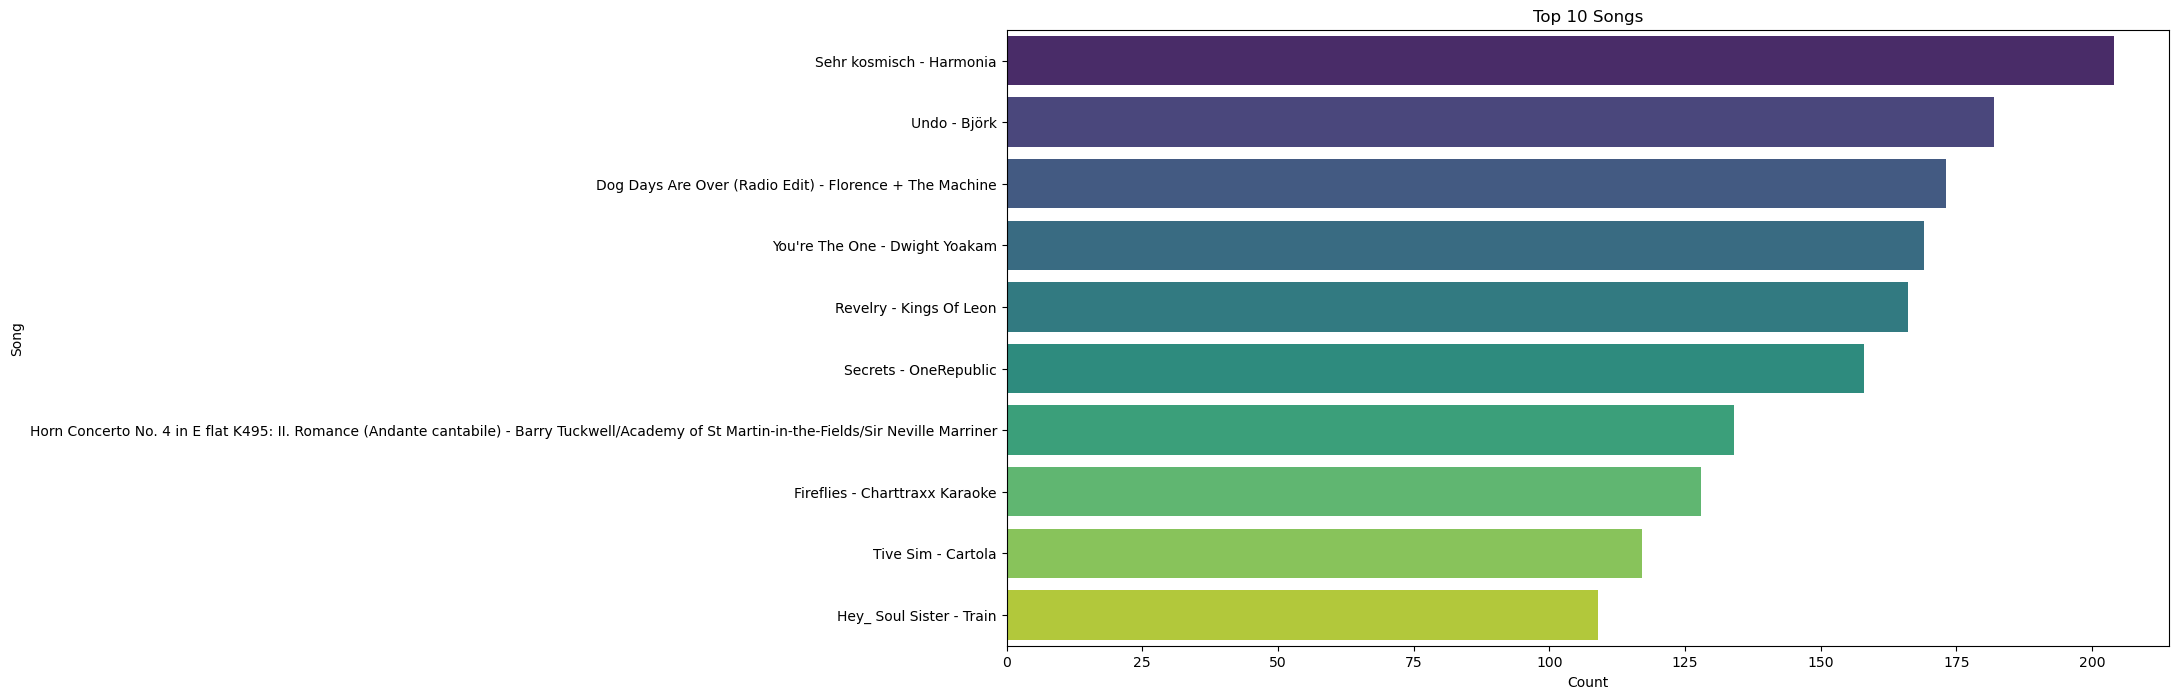

In [8]:
grouped = fulldata.groupby(['songname']).agg({'listen_count': 'count'}).reset_index()
total = grouped['listen_count'].sum()
grouped['percent']  = (grouped['listen_count'] / total ) * 100
grouped = grouped.sort_values(['listen_count', 'songname'], ascending = [0,1])
plt.figure(figsize = (15, 8))
sns.barplot(x='listen_count', y='songname', data=grouped.head(10), hue='songname', palette='viridis', legend=False)
plt.title('Top 10 Songs')
plt.xlabel('Count')
plt.ylabel('Song')
plt.show()

In [9]:
pop_model = Recommenders.popularity_recommender_py()
pop_model.create(fulldata, 'user_id', 'songname')
my_user = fulldata['user_id'][5]
display(pop_model.recommend(my_user))

,user_id,songname,score,Rank
6682,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Sehr kosmisch - Harmonia,204,1.0
8509,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Undo - Björk,182,2.0
1936,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Dog Days Are Over (Radio Edit) - Florence + Th...,173,3.0
9256,b80344d063b5ccb3212f76538f3d9e43d87dca9e,You're The One - Dwight Yoakam,169,4.0
6348,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Revelry - Kings Of Leon,166,5.0
6671,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Secrets - OneRepublic,158,6.0
3372,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Horn Concerto No. 4 in E flat K495: II. Romanc...,134,7.0
2532,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Fireflies - Charttraxx Karaoke,128,8.0
8287,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Tive Sim - Cartola,117,9.0
3254,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Hey_ Soul Sister - Train,109,10.0


In [10]:
item_model = Recommenders.item_similarity_recommender_py()
item_model.create(fulldata, 'user_id', 'songname')
this_user = fulldata['user_id'][100]
items_for_user = item_model.get_user_items(this_user)
print(">>>>>>songs for user <<<<<<")
for item in items_for_user:
    print(item)
print(">>>>>>recs for user<<<<<<")
display(item_model.recommend(this_user))

>>>>>>songs for user <<<<<<
Undo - Björk
Dog Days Are Over (Radio Edit) - Florence + The Machine
High Life - Daft Punk
You're The One - Dwight Yoakam
Where Did You Sleep Last Night - Nirvana
Come As You Are - Nirvana
Hey_ Soul Sister - Train
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile) - Barry Tuckwell/Academy of St Martin-in-the-Fields/Sir Neville Marriner
Rhyme & Reason - DAVE MATTHEWS BAND
Sehr kosmisch - Harmonia
Someone Else's Arms - Mae
Cry For Help (Album Version) - Shinedown
Lady In Black - Ensiferum
For You (Amended/Radio Edit LP) - Staind
Fireflies - Charttraxx Karaoke
Secrets - OneRepublic
Esta Es Para Hacerte Féliz - Jorge Gonzalez
Revelry - Kings Of Leon
Marry Me - Train
OMG - Usher featuring will.i.am
Drop The World - Lil Wayne / Eminem
Ain't Misbehavin - Sam Cooke
Blow Me Away - Breaking Benjamin
Use Somebody - Kings Of Leon
Corn Bread - DAVE MATTHEWS BAND
>>>>>>recs for user<<<<<<
No. of unique songs for the user: 25
no. of unique songs in the tra

,user_id,song,score,rank
0,e006b1a48f466bf59feefed32bec6494495a4436,Lucky (Album Version) - Jason Mraz & Colbie Ca...,0.099839,1
1,e006b1a48f466bf59feefed32bec6494495a4436,Pursuit Of Happiness (nightmare) - Kid Cudi / ...,0.097587,2
2,e006b1a48f466bf59feefed32bec6494495a4436,Somebody To Love - Justin Bieber,0.089141,3
3,e006b1a48f466bf59feefed32bec6494495a4436,Heartbreak Warfare - John Mayer,0.089083,4
4,e006b1a48f466bf59feefed32bec6494495a4436,The Scientist - Coldplay,0.084114,5
5,e006b1a48f466bf59feefed32bec6494495a4436,Alejandro - Lady GaGa,0.080468,6
6,e006b1a48f466bf59feefed32bec6494495a4436,Love Story - Taylor Swift,0.080250,7
7,e006b1a48f466bf59feefed32bec6494495a4436,Bleed It Out [Live At Milton Keynes] - Linkin ...,0.079964,8
8,e006b1a48f466bf59feefed32bec6494495a4436,The Only Exception (Album Version) - Paramore,0.077258,9
9,e006b1a48f466bf59feefed32bec6494495a4436,Billionaire [feat. Bruno Mars] (Explicit Albu...,0.073895,10


In [11]:
song_name = input("Enter a song name in the format 'Title - Artist': ")
sim_songs = item_model.get_similar_items([song_name])
display(sim_songs)

Enter a song name in the format 'Title - Artist':  The Scientist - Coldplay


no. of unique songs in the training set: 9325
Non zero values in cooccurence_matrix :3195


,user_id,song,score,rank
0,,Clocks - Coldplay,0.355556,1
1,,Lucky (Album Version) - Jason Mraz & Colbie Ca...,0.261194,2
2,,Pursuit Of Happiness (nightmare) - Kid Cudi / ...,0.223776,3
3,,Use Somebody - Kings Of Leon,0.222930,4
4,,Fix You - Coldplay,0.219512,5
5,,Yellow - Coldplay,0.217391,6
6,,Bleed It Out [Live At Milton Keynes] - Linkin ...,0.208955,7
7,,Marry Me - Train,0.201183,8
8,,In My Place - Coldplay,0.196429,9
9,,Drop The World - Lil Wayne / Eminem,0.191358,10
